In [1]:
import gower
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from scipy.stats import chi2
import matplotlib.pyplot as plt
import os
import sys

In [3]:
#import custom modules
sys.path.append(os.path.abspath(os.path.join('..','scripts')))
import preprocessing
import utils

In [4]:
df = preprocessing.load_dataset()
dist_matrix = gower.gower_matrix(df)

In [5]:
## will contain tuples (num_of_comoponents, explained_variance)
explained_variances = [] 
for n_components in range(0, 20):
    pca = PCA(n_components=n_components)
    pca.fit(dist_matrix)
    explained_variances.append((n_components, (np.sum(pca.explained_variance_ratio_))))

In [6]:
explained_variances

[(0, 0.0),
 (1, 0.5599287),
 (2, 0.8337401),
 (3, 0.8965658),
 (4, 0.9263722),
 (5, 0.94825166),
 (6, 0.9648884),
 (7, 0.97510105),
 (8, 0.98111826),
 (9, 0.98495376),
 (10, 0.98786306),
 (11, 0.99017483),
 (12, 0.9918662),
 (13, 0.99336773),
 (14, 0.9945841),
 (15, 0.9956451),
 (16, 0.9965661),
 (17, 0.99738866),
 (18, 0.99792093),
 (19, 0.9983644)]

Optimal # of components:  8


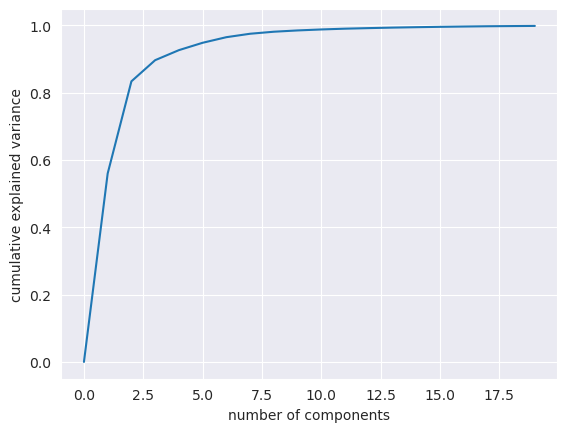

In [7]:
# We take the minimum number of components that explains at least 98% of the variance
threshold_variance = 0.98
optimal_n_components = -1
for i,v in explained_variances:
    if v > threshold_variance:
        optimal_n_components = i
        break
print("Optimal # of components: ", optimal_n_components)

plt.plot([var for (_, var) in explained_variances] )
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

NCOMP = optimal_n_components

In [8]:
pca = PCA(n_components=NCOMP)
# fit and transform the data
pca_result = pca.fit_transform(dist_matrix)
# set the alpha value to indicate the percentil of the chi-squared distribution
alpha = 0.99
# compute chi-squared for given alpha and degrees of freedom
chi_2 = chi2.ppf(alpha, df=NCOMP)

# eigenvalues of the covariance matrix
lambdas = np.sqrt(pca.explained_variance_)

## we take the sum of the squared coordinates divided by the eigenvalues
## if it's greater than the chi2 value we consider it an outlier
outlier_indices = -(1 * (np.sum((pca_result ** 2) / np.transpose(lambdas), axis=1) > chi_2))

In [9]:
pca_result

array([[ 4.6820526 ,  2.4261892 , -1.5336841 , ...,  0.69580203,
         0.04445121,  0.3515375 ],
       [-1.6742765 ,  0.8968522 ,  0.3618241 , ..., -0.1811052 ,
         0.17089461,  0.04107174],
       [-2.330734  ,  0.7204417 ,  0.19804257, ..., -0.08103375,
         0.06252441,  0.02135613],
       ...,
       [ 1.1283629 ,  0.8180058 ,  0.8237716 , ...,  0.9051566 ,
        -1.1417367 , -0.29216683],
       [-0.4088545 , -2.7981951 , -0.10742449, ..., -0.30278718,
         0.13894814, -0.03933528],
       [ 1.073268  ,  0.85732967,  0.81384087, ...,  1.098756  ,
        -1.2037449 , -0.18131958]], dtype=float32)

In [10]:
sum(outlier_indices)

-371